In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [42]:

df = pd.read_csv("CSV_Files/Training and Testing Sets/UNSW_NB15_training-set.csv", low_memory=False)
print(df.shape)
print(df[['attack_cat','label']].head())
print(df['label'].value_counts())


(175341, 45)
  attack_cat  label
0     Normal      0
1     Normal      0
2     Normal      0
3     Normal      0
4     Normal      0
label
1    119341
0     56000
Name: count, dtype: int64


In [43]:
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (175341, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              1753

In [44]:
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])


Missing values:
 Series([], dtype: int64)


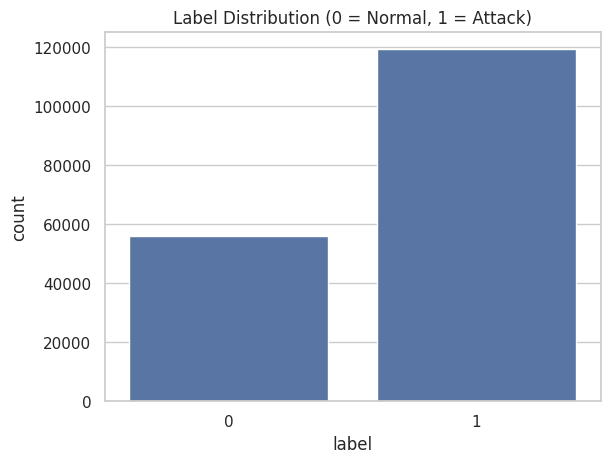

In [45]:
sns.countplot(x='label', data=df)
plt.title("Label Distribution (0 = Normal, 1 = Attack)")
plt.show()


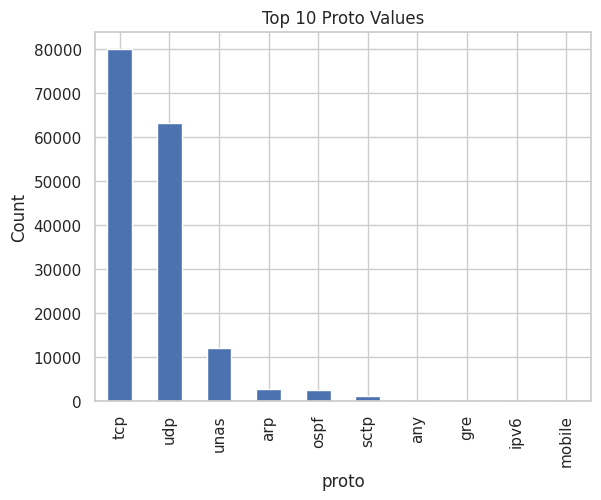

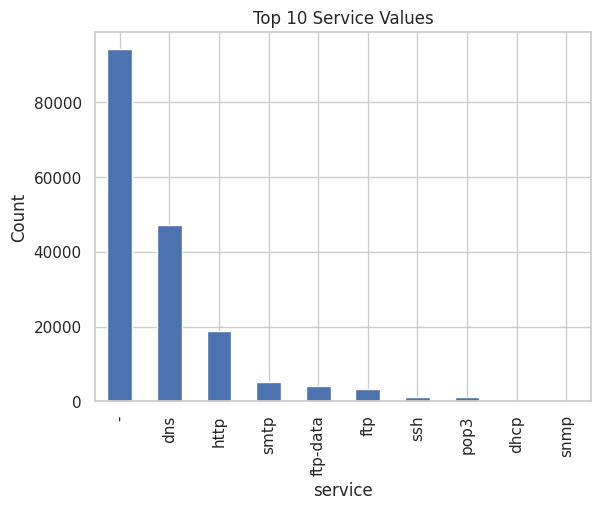

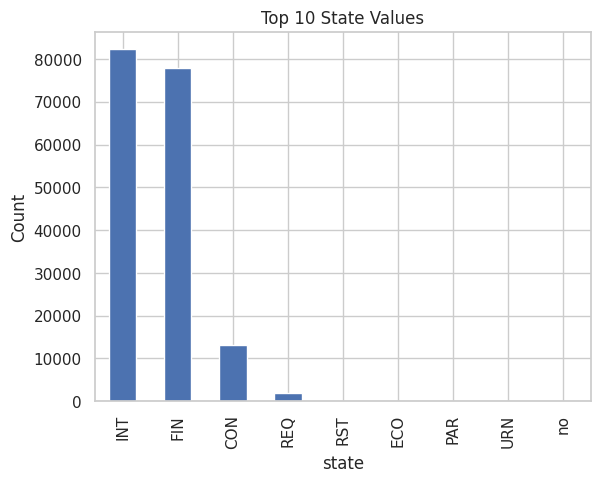

In [46]:
for col in ['proto', 'service', 'state']:
    if col in df.columns:
        df[col].value_counts().head(10).plot(kind='bar')
        plt.title(f"Top 10 {col.capitalize()} Values")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()


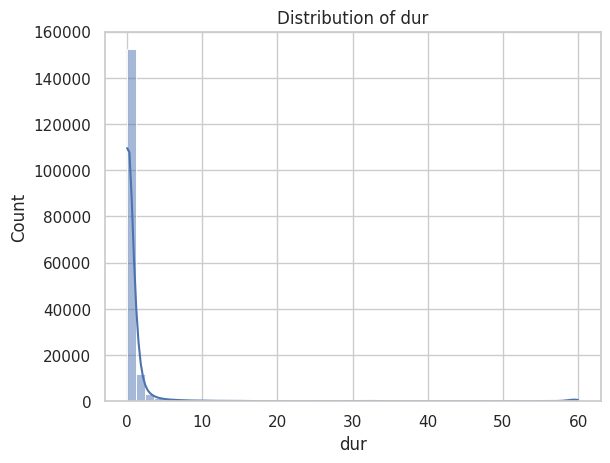

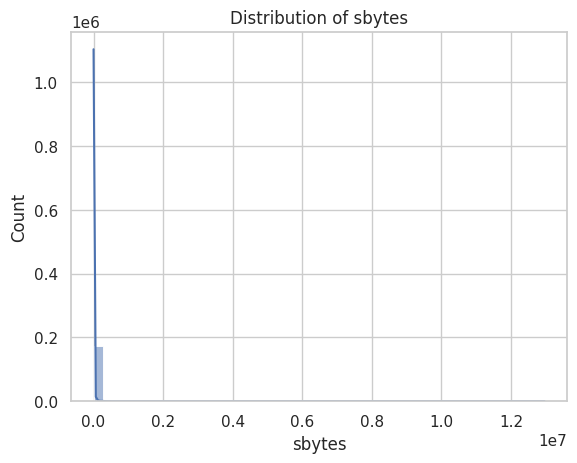

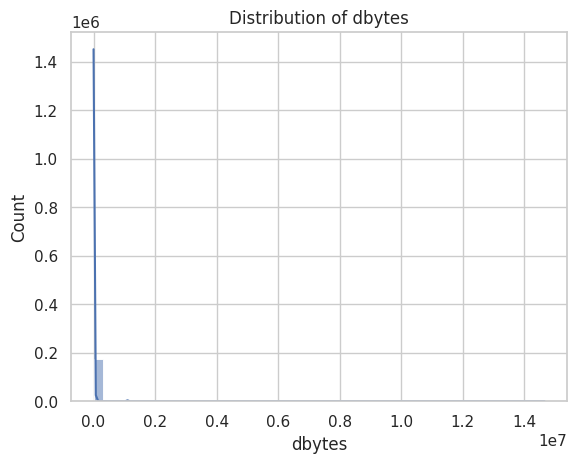

In [47]:
for col in ['dur', 'sbytes', 'dbytes']:
    if col in df.columns:
        sns.histplot(df[col], bins=50, kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()


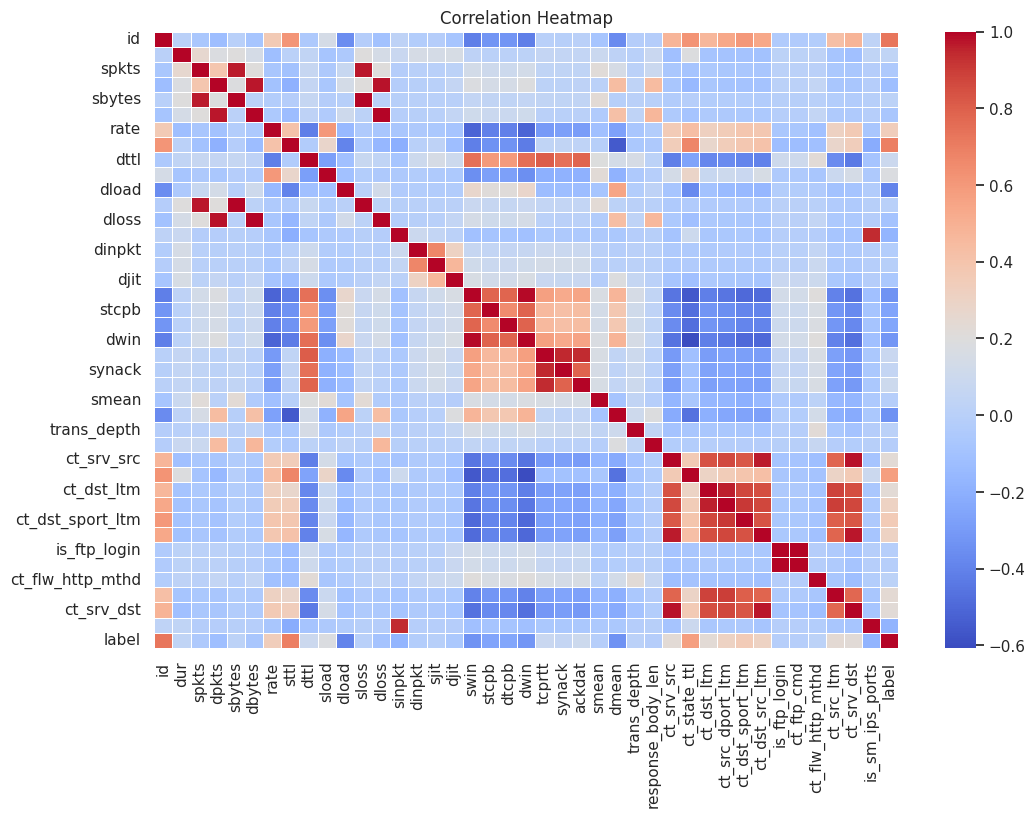

In [48]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


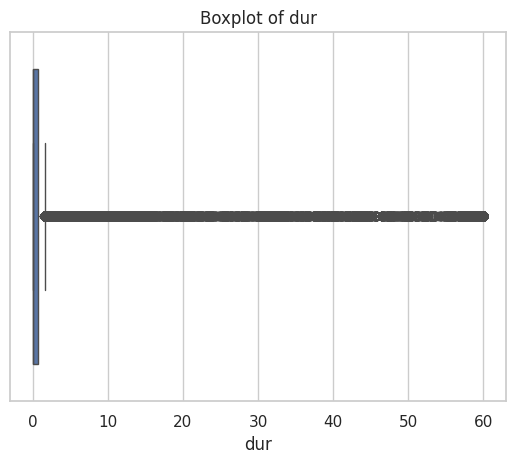

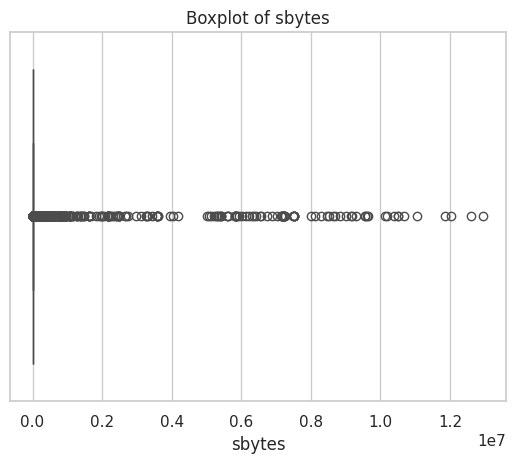

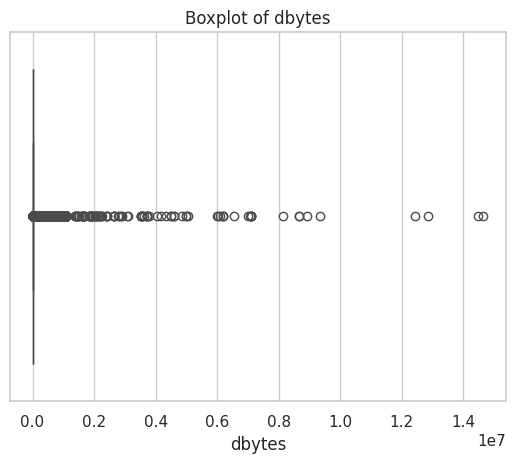

In [49]:
for col in ['dur', 'sbytes', 'dbytes']:
    if col in df.columns:
        sns.boxplot(data=df, x=col)
        plt.title(f"Boxplot of {col}")
        plt.show()


### ✅ Conclusion
- Loaded WorkingCSV dataset with 51 columns (49 features + attack_cat + label)
- Found distributions for protocols, services, and flow durations
- Identified potential outliers in byte and duration columns
- Ready for preprocessing and model training
